머신러닝의 '비지도 학습(Unsupervised Learning)' 영역으로 들어가는 관문이다. 그중에서도 데이터의 복잡성을 줄이고 시각화를 가능하게 하는 '차원 축소(Dimensionality Reduction)', 특히 PCA(주성분 분석)를 깊이 있게 다룬다.

이 시간의 핵심은 "수십, 수백 개의 검사 항목(변수)을 가진 환자 데이터를 어떻게 단 2~3개의 지표로 압축하여 한눈에 파악할 것인가?"를 이해하는 것이다.

---

# 📘 1.1. 차원 축소: 정보의 홍수 속에서 본질을 꿰뚫는 법

## 1. 다다익선(多多益善)의 함정: 차원의 저주

### 1) 정보가 너무 많으면 오히려 독이 된다
우리는 흔히 "정보는 많으면 많을수록 좋다"고 생각한다. 환자를 진단할 때 혈압만 아는 것보다는 혈압, 체온, 맥박, 혈당, 가족력, 유전자 정보까지 다 아는 게 더 정확할 것이라고 믿는다. 직관적으로는 맞는 말이다. 하지만 머신러닝의 세계, 특히 수학적인 공간에서는 이것이 심각한 문제를 야기한다. 이를 '차원의 저주(Curse of Dimensionality)'라고 한다.

이 현상을 이해하기 위해 간단한 비유를 들어보자.
*   1차원 (선): 10미터짜리 밧줄 위에 동전 하나를 떨어뜨렸다. 눈을 감고 밧줄을 더듬어서 동전을 찾으려면, 최대 10미터만 훑으면 된다. 쉽다.
*   2차원 (면): 10미터 $\times$ 10미터 크기의 운동장에 동전을 떨어뜨렸다. 이제 찾아야 할 면적은 100제곱미터다. 밧줄 때보다 훨씬 힘들다.
*   3차원 (공간): 10미터 $\times$ 10미터 $\times$ 10미터 크기의 수영장에 동전을 떨어뜨렸다. 부피는 1,000세제곱미터가 된다. 사실상 동전을 찾는 것은 불가능에 가깝다.


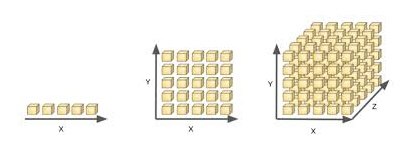


데이터 분석에서도 똑같은 일이 벌어진다.
환자 한 명을 설명하는 변수(특성)가 늘어날수록, 그 환자가 위치하는 수학적 공간(차원)은 기하급수적으로 거대해진다.
*   변수 1개: 환자는 선 위의 점이다.
*   변수 100개: 환자는 100차원 공간 속의 점이다.
*   변수 20,000개 (유전체 데이터): 환자는 20,000차원이라는 상상할 수 없는 거대한 우주 속의 미세먼지 같은 점이 된다.

### 2) 헬스케어 데이터의 희소성(Sparsity)
차원이 커지면 데이터 포인트(환자)들 사이의 거리가 너무 멀어진다. 공간은 넓은데 데이터는 듬성듬성 있는 상태, 이를 '희소하다(Sparse)'고 한다.
머신러닝 모델은 데이터들 사이의 거리나 밀도를 보고 패턴을 찾는데, 데이터가 너무 멀리 떨어져 있으면 "이 환자와 저 환자가 비슷하다"는 판단 자체를 내릴 수 없게 된다.
즉, 변수(차원)를 무작정 늘리는 것은 모델을 혼란스럽게 만들고, 연산 속도를 늦추며, 과적합(Overfitting)을 유발하는 지름길이다. 그래서 우리는 불필요한 군더더기를 쳐내고 핵심만 남기는 '차원 축소'가 반드시 필요하다.

---

## 2. 압축의 미학: 그림자 놀이와 PCA(주성분 분석)

그렇다면 어떻게 정보를 줄일 것인가?
가장 단순한 방법은 '변수 선택(Feature Selection)'이다. "키, 몸무게, 시력, 청력 중에 시력과 청력은 필요 없으니 버리자." 이것은 쉽지만, 버려진 변수에 중요한 정보가 있었다면 영영 잃어버리게 된다.

더 세련된 방법은 '차원 축소(Dimensionality Reduction)', 그중에서도 PCA(Principal Component Analysis)이다. PCA는 변수를 버리는 것이 아니라, 여러 변수를 섞어서 '새로운 요약 변수(주성분)'를 만들어낸다.

### 1) 플라톤의 동굴과 그림자 놀이
PCA의 원리를 가장 잘 설명하는 비유는 '손 그림자 놀이'이다.
*   현실 (3차원): 당신의 손은 입체적이다. 두께도 있고 굴곡도 있다.
*   그림자 (2차원): 벽에 비친 손 그림자는 평면이다. 3차원 정보가 2차원으로 '차원 축소'된 것이다.

이때, 손을 어떤 각도로 비추느냐에 따라 그림자의 모양이 달라진다.
*   상황 A (좋은 각도): 손바닥을 전등 정면으로 쫙 펴서 비춘다. 그림자만 봐도 다섯 손가락이 다 보이고 "아, 저건 손이구나"라고 알 수 있다. 정보가 잘 보존되었다.
*   상황 B (나쁜 각도): 손날을 세워서 비춘다. 그림자는 그냥 얇은 막대기처럼 보인다. 이걸 보고 손이라고 맞출 수 있는 사람은 없다. 정보가 손실되었다.

PCA의 목표는 바로 상황 A를 찾는 것이다. "원래 데이터(손)가 가진 정보를 가장 많이 머금고 있는 그림자(투영)를 찾아내는 기술"이다.

### 2) 분산(Variance)이 곧 정보(Information)다
그렇다면 '정보가 많다'는 것을 수학적으로는 어떻게 정의할까? 통계학에서는 '분산(Variance)'을 정보량으로 본다.
*   분산이 0인 경우: 모든 환자의 키가 170cm로 똑같다. 이 데이터는 분석할 가치가 없다. 정보가 없기 때문이다.
*   분산이 큰 경우: 환자들의 키가 150cm부터 190cm까지 다양하게 퍼져 있다. 우리는 이 차이를 통해 무언가를 알아낼 수 있다. 정보가 많다.

다시 그림자 비유로 돌아가자.
*   손바닥 그림자: 넓게 퍼져 있다. (분산이 크다 $\rightarrow$ 정보가 많다)
*   손날 그림자: 좁게 모여 있다. (분산이 작다 $\rightarrow$ 정보가 적다)

결국 PCA는 "데이터들이 가장 넓게 퍼져 보이는(분산이 가장 큰) 방향을 찾아서, 그 방향으로 축을 돌리는 작업"이다.

---

## 3. 주성분(Principal Component): 새로운 축의 탄생

PCA가 찾아낸 '가장 분산이 큰 방향'을 우리는 주성분(Principal Component, PC)이라고 부른다.

### 1) 제1 주성분 (PC1): 럭비공의 긴 축
데이터가 타원형(럭비공 모양)으로 분포해 있다고 상상해보자.
우리가 기존에 쓰던 $x$축(키), $y$축(몸무게)은 인간이 편의상 정한 기준일 뿐이다. 데이터 입장에서는 억울하다. 데이터는 대각선 방향으로 길게 늘어서 있는데, 우리는 억지로 수직/수평으로만 보려고 하기 때문이다.

PCA는 데이터에게 묻는다. "너희들이 가장 길게 늘어서 있는 방향이 어디니?"
*   데이터의 중심을 지나면서, 데이터가 가장 길게 뻗어있는 방향으로 선을 긋는다.
*   이 선이 바로 제1 주성분(PC1)이다.
*   이 PC1 축 하나만 있으면, 우리는 데이터가 가진 정보의 상당 부분(예: 70%)을 설명할 수 있다.

### 2) 제2 주성분 (PC2): 남은 것 중 최고
PC1을 찾았다면, 이제 PC1과는 겹치지 않는 새로운 정보를 찾아야 한다.
*   PC1과 수직(직각, Orthogonal)이면서, 남은 정보 중 가장 분산이 큰 방향을 찾는다.
*   이것이 제2 주성분(PC2)이다. 럭비공의 짧은 축에 해당한다.

이렇게 PC1, PC2... 순서대로 찾아 나가면, 우리는 수백 개의 변수를 단 몇 개의 주성분으로 요약할 수 있다. PC1과 PC2만 남기고 나머지를 버려도, 전체 정보의 90% 이상을 보존할 수 있는 것이다.

---

## 4. 헬스케어에서 PCA가 강력한 이유

왜 헬스케어 데이터 분석에서 PCA를 배워야 할까? 이 기술이 의료 현장의 난제들을 해결해주기 때문이다.

### 1) 유전체 분석 (Genomics): 2만 개를 2개로
환자 한 명의 유전자 발현 정보는 보통 20,000개가 넘는 변수로 이루어진다. 환자 수는 50명인데 변수가 2만 개라면, 어떤 머신러닝 모델도 제대로 작동하지 못한다(차원의 저주).
이때 PCA를 돌려서 상위 3개의 주성분(PC1, PC2, PC3)만 뽑아낸다. 이 3개만 가지고 3차원 그래프를 그리면, 놀랍게도 2만 개의 변수를 볼 때보다 훨씬 명확하게 암 환자군과 정상군이 분리되어 보이는 것을 확인할 수 있다.

### 2) 의료 영상 처리 (Medical Imaging)
MRI나 CT 이미지는 수만 개의 픽셀(변수)로 이루어져 있다. 하지만 뼈나 장기의 모양을 결정하는 중요한 정보는 전체 픽셀 중 일부의 패턴에 집중되어 있다.
PCA를 적용하면 이미지의 자잘한 노이즈(배경 잡음)는 제거하고, 장기의 주된 윤곽(Shape) 정보만 남길 수 있다. 이를 통해 저장 용량을 줄이고 진단 모델의 속도를 높인다.

### 3) 다중공선성(Multicollinearity) 해결
1일차에 배웠던 다중공선성 문제를 기억하는가? 'BMI'와 '허리둘레'처럼 너무 비슷한 변수가 같이 있으면 모델이 헷갈려 한다.
PCA는 이 비슷한 변수들을 섞어서 "비만도"라는 하나의 주성분으로 합쳐버린다. 변수 간의 상관관계를 없애주기 때문에(직교성), 더 안정적인 분석이 가능해진다.

---

## 5. 요약: 잃는 것과 얻는 것 (Trade-off)

차원 축소는 공짜 점심이 아니다. 3차원 손을 2차원 그림자로 만들면, 필연적으로 '손의 두께 정보'는 사라진다. 이를 정보 손실(Information Loss)이라고 한다.

하지만 데이터 분석가는 결단을 내려야 한다.
> "정보를 100% 다 쥐고 있으면서, 복잡함에 허덕이고 시각화도 못 할 것인가?"
> "아니면 정보를 5% 정도 잃더라도, 데이터를 2차원으로 압축해서 눈으로 직접 보고 직관적인 통찰을 얻을 것인가?"

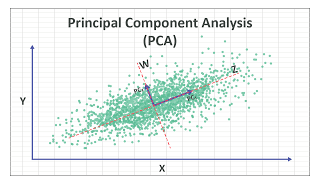


## 1.2. [예제 1] 차원의 저주 시각화

차원이 늘어날수록 데이터 간의 거리가 어떻게 변하는지, 왜 고차원 공간이
‘텅 비게’ 되는지 시뮬레이션으로 확인한다.

``` python
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

# 1. 데이터 생성 함수
def generate_data(n_samples, n_features):
    # 0과 1 사이에서 무작위 데이터 생성
    return np.random.rand(n_samples, n_features)

# 2. 차원에 따른 점들 사이의 거리 분포 비교
n_samples = 100
dims = [2, 10, 100, 1000] # 2차원부터 1000차원까지 실험

plt.figure(figsize=(12, 6))

for dim in dims:
    X = generate_data(n_samples, dim)
    # 모든 점들 간의 쌍(Pair) 거리 계산 (유클리드 거리)
    distances = pdist(X, metric='euclidean')
    
    # 히스토그램 그리기
    plt.hist(distances, bins=30, alpha=0.5, density=True, label=f'{dim}-Dimensions')

plt.title('The Curse of Dimensionality: Distance Distribution')
plt.xlabel('Euclidean Distance')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# 설명:
# 차원(Dimension)이 커질수록 거리의 평균값이 오른쪽(큰 값)으로 이동한다.
# 또한 1000차원쯤 되면 모든 점 사이의 거리가 다 비슷비슷하게 멀어진다.
# "가까운 이웃"이라는 개념이 희석되어, 거리 기반 알고리즘(KNN, K-Means)이 작동하지 않게 된다.
```


> 📖 가이드
>
> 차원의 저주(Curse of Dimensionality)가 얼마나 무서운지 시각화로 확인합니다.
> - 상황: 데이터의 차원(변수 개수)이 2개(평면)에서 1000개(초공간)로 늘어납니다.
> - 현상: 차원이 커질수록 점들 사이의 거리가 점점 멀어지고 비슷해집니다.
> - 결과: "가장 가까운 이웃"이라는 개념이 사라져, 거리 기반 알고리즘(KNN, K-Means)이 작동 불능 상태가 됩니다.



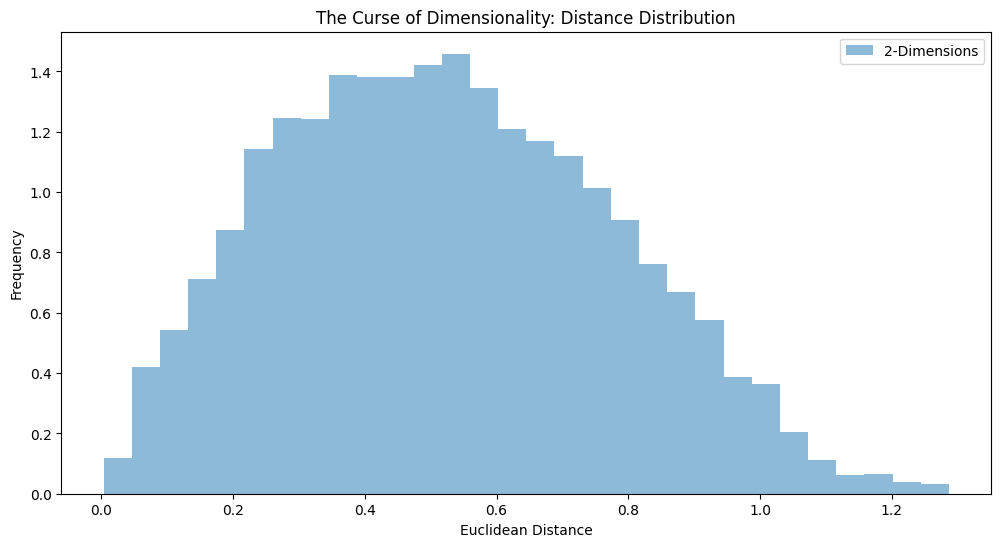

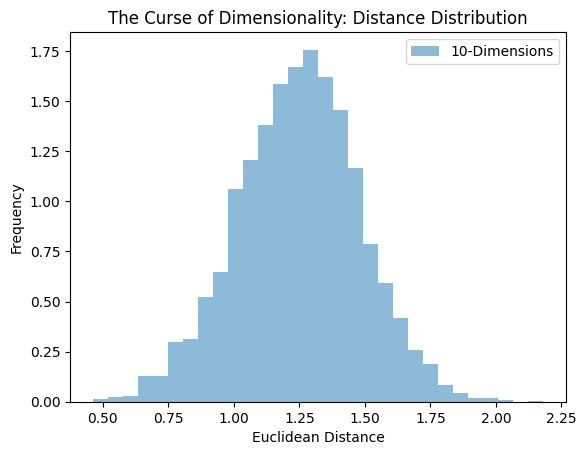

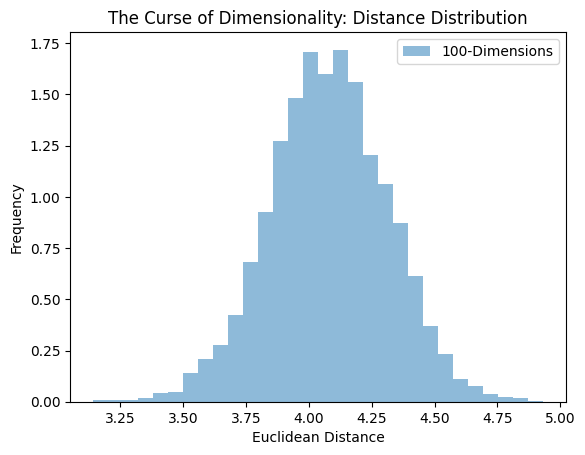

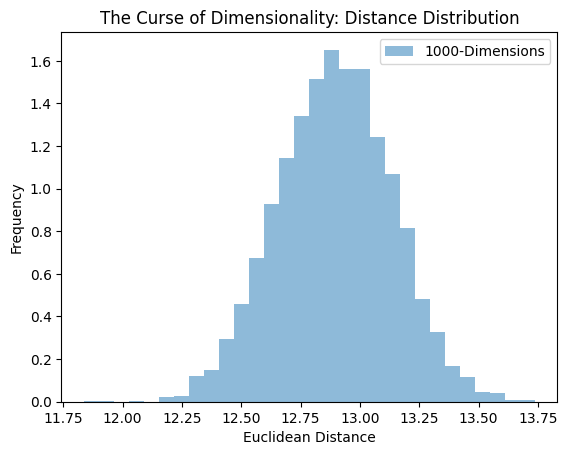

In [6]:
# do write code
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist

def generate_data(n_samples, n_features):
    return np.random.rand(n_samples, n_features)

n_samples = 100
dims = [2, 10, 100, 1000]

plt.figure(figsize=(12, 6))

for dim in dims:
    x = generate_data(n_samples, dim)
    distances = pdist(x, metric='euclidean')

    plt.hist(distances, bins=30, alpha = 0.5, density=True, label=f'{dim}-Dimensions')

    plt. title('The Curse of Dimensionality: Distance Distribution')
    plt.xlabel('Euclidean Distance')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    

## 1.3. [예제 2] PCA의 원리: 축 회전 (Rotation)

2차원 데이터를 생성하고, PCA가 어떻게 ’분산이 가장 큰 축’을 찾아내는지
시각적으로 확인한다.

``` python
from sklearn.decomposition import PCA

# 1. 상관관계가 있는 2차원 데이터 생성 (타원형 분포)
np.random.seed(42)
n_samples = 200
X = np.dot(np.random.randn(n_samples, 2), [[0.6, 0.2], [0.1, 0.4]])
X = X - np.mean(X, axis=0) # 중심을 0으로 이동

# 2. PCA 수행 (2개의 주성분 찾기)
pca = PCA(n_components=2)
pca.fit(X)

# 3. 주성분(고유벡터) 확인
components = pca.components_
variance = pca.explained_variance_

# 4. 시각화
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0, color='red')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], alpha=0.4)

# 주성분 벡터 그리기 (길이는 분산의 크기에 비례)
for length, vector in zip(variance, components):
    v = vector * 3 * np.sqrt(length) # 시각화를 위해 길이 스케일링
    draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal')
plt.title('PCA: Finding Principal Components (Axes)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

# 설명:
# 데이터가 대각선으로 길게 퍼져 있다.
# PCA가 찾은 첫 번째 화살표(PC1, 긴 것)가 데이터가 가장 넓게 퍼진 방향을 정확히 가리킨다.
# 두 번째 화살표(PC2, 짧은 것)는 그에 수직이다. 이 화살표들이 새로운 좌표축이 된다.
```


> 📖 가이드
>
> PCA가 데이터를 압축하는 핵심 원리인 축 회전(Rotation)을 확인합니다.
> - 기존 축: X축, Y축 (우리가 정한 기준)
> - 새로운 축(주성분): 데이터가 가장 길게 뻗어 있는 방향 (데이터가 정한 기준)
> - PC1 (제1주성분): 분산(정보량)이 가장 큰 방향. 가장 긴 화살표.
> - PC2 (제2주성분): PC1과 수직이면서 그 다음으로 분산이 큰 방향.



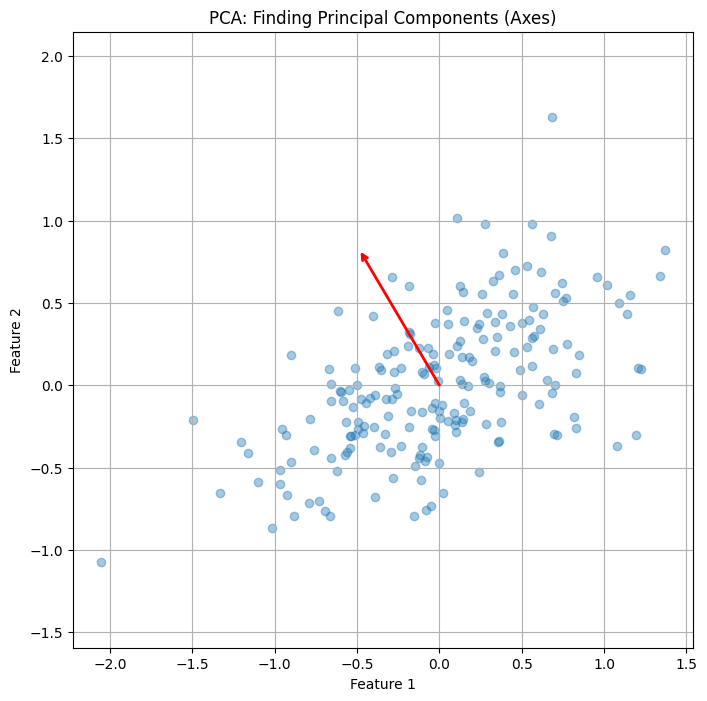

In [7]:
# do write code
from sklearn.decomposition import PCA

# 1. 상관관계가 있는 2차원 데이터 생성 (타원형 분포)
np.random.seed(42)
n_samples = 200
X = np.dot(np.random.randn(n_samples, 2), [[0.6, 0.2], [0.1, 0.4]])
X = X - np.mean(X, axis=0) # 중심을 0으로 이동

# 2. PCA 수행 (2개의 주성분 찾기)
pca = PCA(n_components=2)
pca.fit(X)

# 3. 주성분(고유벡터) 확인
components = pca.components_
variance = pca.explained_variance_

# 4. 시각화
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0, color='red')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], alpha=0.4)

# 주성분 벡터 그리기 (길이는 분산의 크기에 비례)
for length, vector in zip(variance, components):
    v = vector * 3 * np.sqrt(length) # 시각화를 위해 길이 스케일링
    draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal')
plt.title('PCA: Finding Principal Components (Axes)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

## 1.4. [예제 3] 4차원을 2차원으로: 붓꽃(Iris) 데이터 시각화

4개의 변수(꽃받침 길이/너비, 꽃잎 길이/너비)를 가진 붓꽃 데이터를
2차원으로 압축하여, 품종별로 잘 나뉘는지 확인한다.

``` python
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns

# 1. 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

print("원본 데이터 차원:", X.shape) # (150, 4) -> 4차원이라 그래프를 그릴 수 없음

# 2. PCA 적용 (4차원 -> 2차원)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("변환된 데이터 차원:", X_pca.shape) # (150, 2) -> 2차원

# 3. 데이터프레임으로 정리
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = y
# 숫자 라벨을 이름으로 변경 (0->setosa...)
df_pca['Target_Name'] = df_pca['Target'].map({0: target_names[0], 1: target_names[1], 2: target_names[2]})

# 4. 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Target_Name', data=df_pca, palette='viridis', s=100)
plt.title('PCA of Iris Dataset (4D -> 2D)')
plt.show()

# 설명:
# 우리는 4개의 변수 중 2개를 버린 게 아니라, 4개를 섞어서 가장 정보가 많은 2개(PC1, PC2)를 만들었다.
# 2차원 평면상에서 Setosa(보라색)가 다른 품종과 완벽하게 분리되어 있음을 한눈에 볼 수 있다.
# 이것이 차원 축소를 이용한 시각화의 힘이다.
```


> 📖 가이드
>
> 4차원 데이터를 2차원으로 줄여서 눈으로 볼 수 있게(Visualization) 만듭니다.
> - 데이터: 붓꽃(Iris) 데이터. 꽃받침 길이/너비, 꽃잎 길이/너비 (4개 변수)
> - PCA: 4개의 변수를 잘 섞어서 가장 정보가 많은 PC1, PC2 2개만 남깁니다.
> - 효과: 4차원 초공간에서는 상상조차 안 되던 데이터 분포가, 2차원 모니터 화면에 깔끔하게 펼쳐집니다.



원본 데이터 차원: (150, 4)
변환된 데이터 차원: (150, 2)


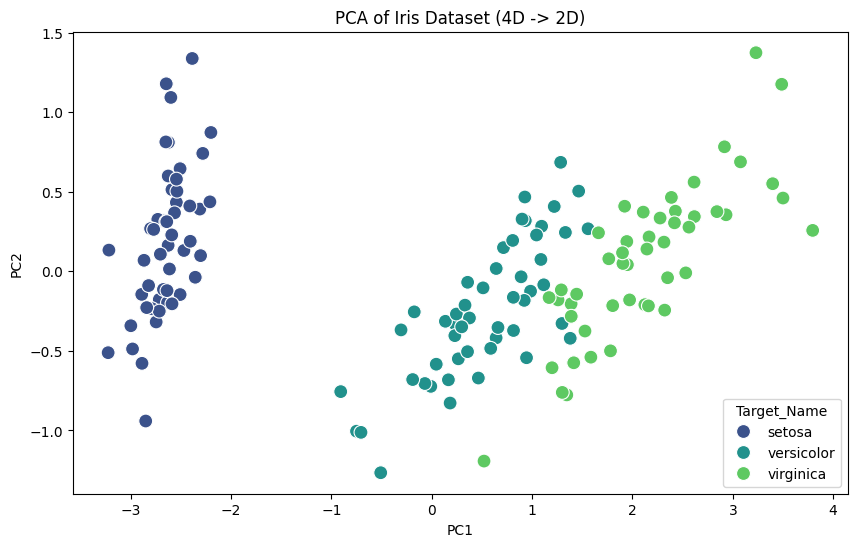

In [9]:
# do write code
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns

iris = load_iris()
x = iris.data
y = iris.target
target_names = iris.target_names

print("원본 데이터 차원:", x.shape)

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

print("변환된 데이터 차원:", x_pca.shape)

df_pca = pd.DataFrame(data=x_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = y
df_pca['Target_Name'] = df_pca['Target'].map({0: target_names[0], 1:target_names[1], 2: target_names[2]})

plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', hue='Target_Name', data=df_pca, palette='viridis', s=100)
plt.title('PCA of Iris Dataset (4D -> 2D)')
plt.show()


## 1.5. [예제 4] 적절한 차원 수 찾기: 설명된 분산 비율 (Elbow Point)

유방암 데이터셋(30개 변수)을 사용하여, 과연 몇 개의 주성분만 남기는 것이
좋을지 결정하는 방법을 배운다.

``` python
from sklearn.datasets import load_breast_cancer

# 1. 유방암 데이터 로드 (30차원)
cancer = load_breast_cancer()
X_cancer = cancer.data

# 2. PCA 적용 (모든 성분 다 유지해보기)
pca = PCA().fit(X_cancer)

# 3. 설명된 분산 비율(Explained Variance Ratio) 확인
# 각 주성분이 원본 데이터의 정보를 얼마나 담고 있는지 나타냄
explained_variance_ratio = pca.explained_variance_ratio_

# 누적 분산 비율 계산
cumulative_variance = np.cumsum(explained_variance_ratio)

# 4. Scree Plot 그리기
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.9, color='r', linestyle=':') # 90% 정보 보존선
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot: How many components do we need?')
plt.grid(True)
plt.show()

# 설명:
# 그래프를 보면 초반 1~2개의 주성분만으로도 전체 정보의 60~70% 이상을 설명한다.
# 약 5~6개의 주성분이면 원본 정보의 90%를 보존할 수 있다.
# 즉, 30개의 변수를 다 쓸 필요 없이 5개만 써도 충분하다는 결론을 얻는다.
```


> 📖 가이드
>
> "그래서 변수를 몇 개까지 줄여도 되나요?"에 대한 대답을 찾습니다. (Scree Plot)
> - Elbow Point: 그래프가 꺾이는 팔꿈치 지점. 가성비가 가장 좋은 차원 수입니다.
> - 누적 분산 비율: 주성분을 하나씩 더할 때마다 원본 정보의 몇 %가 설명되는지 봅니다. 보통 85~90% 이상이 되는 지점을 선택합니다.



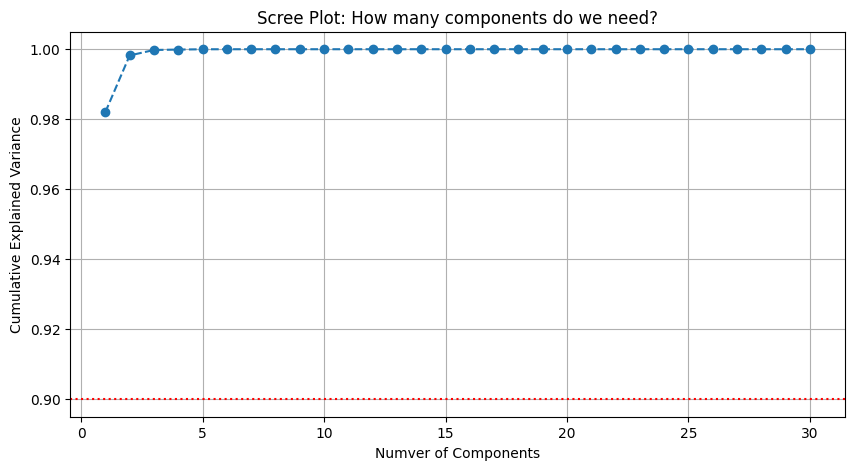

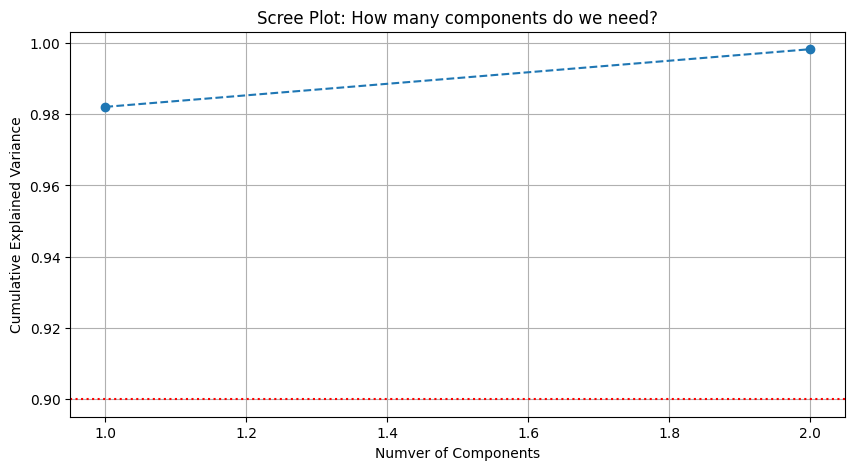

In [ ]:
# do write code
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
x_cancer = cancer.data

pca = PCA().fit(x_cancer)
#pca = PCA(n_components=2).fit(x_cancer)

explrained_variance_ratio = pca.explained_variance_ratio_

cumulative_variance = np.cumsum(explrained_variance_ratio)

plt.figure(figsize=(10,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.9, color='r', linestyle=':')
plt.xlabel('Numver of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot: How many components do we need?')
plt.grid(True)
plt.show()


#n_components
pca = PCA(n_components=2).fit(x_cancer)
explrained_variance_ratio = pca.explained_variance_ratio_

cumulative_variance = np.cumsum(explrained_variance_ratio)

plt.figure(figsize=(10,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.9, color='r', linestyle=':')
plt.xlabel('Numver of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot: How many components do we need?')
plt.grid(True)
plt.show()

## 1.6. [예제 5] PCA의 응용: 노이즈 제거 (Inverse Transform)

PCA가 정보를 압축했다가 다시 복원할 때, 사소한 정보(노이즈)는 사라지고
핵심(신호)만 남는 원리를 확인한다.

``` python
from sklearn.datasets import load_digits

# 1. 손글씨 숫자 데이터 로드 (8x8 이미지 = 64차원)
digits = load_digits()
X_digits = digits.data

# 2. 데이터 시각화 함수
def plot_digits(data, title):
    fig, axes = plt.subplots(1, 10, figsize=(10, 2),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', interpolation='nearest', clim=(0, 16))
    plt.suptitle(title, y=1.05)

# 3. 원본 데이터에 노이즈 추가
np.random.seed(42)
noisy_digits = X_digits + np.random.normal(0, 4, X_digits.shape)
plot_digits(noisy_digits, "Noisy Data (Input)")

# 4. PCA로 압축 후 복원 (Denoising)
# 64차원 -> 16차원(약 25%만 사용)으로 압축
pca = PCA(0.50).fit(noisy_digits) # 정보의 50%만 보존하도록 설정
digits_compressed = pca.transform(noisy_digits)
digits_restored = pca.inverse_transform(digits_compressed)

# 5. 복원된 데이터 시각화
plot_digits(digits_restored, "Restored Data (After PCA)")
plt.show()

print(f"원본 차원: {noisy_digits.shape[1]}")
print(f"압축 차원: {pca.n_components_}")

# 설명:
# 노이즈가 낀 지저분한 이미지(위쪽)가 PCA를 거치고 나니 좀 더 깨끗해졌다(아래쪽).
# PCA가 "숫자의 모양(주성분)"은 중요한 정보라 남기고, "무작위 노이즈"는 중요하지 않다고 판단해 버렸기 때문이다.
# 헬스케어의 생체 신호(심전도 등) 잡음 제거에도 이 원리가 사용된다.
```


> 📖  가이드
>
> PCA를 거꾸로 돌려서 노이즈 제거(Denoising) 효과를 확인합니다.
> - 압축: 64차원(손글씨 이미지) -> 16차원으로 압축하며 자잘한 노이즈(찌꺼기 정보)를 버립니다.
> - 복원: 16차원 -> 64차원으로 다시 늘립니다.
> - 결과: 중요하지 않은 노이즈는 사라지고, 숫자의 핵심 뼈대(주성분)만 깨끗하게 남습니다.



In [ ]:
# do write code
